In [ ]:
import pandas as pd
import numpy as np
import pandas_gbq
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [ ]:
#selecting the data from the bigqery which is cleaned and wrangled
query = "SELECT * FROM `formidable-pact-448509-e7.solution_3.VidyaMandir`"
Vidyamandir = pandas_gbq.read_gbq(query, project_id="formidable-pact-448509-e7")
Vidyamandir

Downloading: 100%|██████████|


,Student_Roll,Student_Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer_Science,Physical_Education,Year
0,1001,Akash Ahuja,30,95,78,92,84,36,47,82,44,14,74,2019
1,1002,Mohit Srivatsav,32,46,65,53,28,77,36,76,74,77,27,2019
2,1003,Anshika Mehra,87,91,74,81,88,100,45,37,10,44,11,2019
3,1004,Visakha Tamboli,65,83,83,78,45,61,16,89,52,23,50,2019
4,1005,Raju Deshmukh,84,66,98,62,68,99,70,61,65,75,87,2019
5,1006,Aruna Iyer,90,50,56,78,33,100,74,17,72,74,34,2019
6,1007,Ramesh Gowda,75,23,70,36,67,60,48,51,42,89,29,2019
7,1008,Anamika Kumari,66,20,91,82,92,96,95,27,38,83,41,2019
8,1009,Piyush Pande,50,95,85,15,53,45,73,88,41,24,17,2019
9,1010,Subhajeet Dutta,23,46,65,13,23,81,44,17,62,84,66,2019


In [ ]:
query2 = "SELECT * FROM `formidable-pact-448509-e7.solution_3.StJoseph`"
StJoseph = pandas_gbq.read_gbq(query2, project_id="formidable-pact-448509-e7")
StJoseph

Downloading: 100%|██████████|


,Student_Roll,Student_Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer_Science,Physical_Education,Year
0,2001,Ashok Chauhan,67,33,47,96,80,86,89,33,55,42,58,2019
1,2002,Bibhor Gupta,82,43,27,98,33,64,53,27,65,26,62,2019
2,2003,Akshay Agarwal,71,52,92,86,43,64,33,35,41,31,48,2019
3,2004,Rahul Bansal,71,58,35,54,97,38,37,46,36,42,98,2019
4,2005,Kriti Singh,40,55,40,35,60,28,61,78,31,85,72,2019
5,2006,Reshma Sultana,33,94,50,30,79,60,49,91,35,33,49,2019
6,2007,Agriya Marandi,69,48,92,55,57,63,81,52,52,54,88,2019
7,2008,Emanuel Joseph,46,46,25,39,39,54,51,30,75,68,80,2019
8,2009,Rituraj Khanna,83,59,43,88,52,60,66,27,43,94,27,2019
9,2010,Sofiya Ahmed,85,76,72,85,59,92,84,73,39,41,45,2019


In [ ]:
query3 = "SELECT * FROM `formidable-pact-448509-e7.solution_3.DPS`"
DPS = pandas_gbq.read_gbq(query3, project_id="formidable-pact-448509-e7")
DPS

Downloading: 100%|██████████|


,Student_Roll,Student_Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer_Science,Physical_Education,Year
0,3001,Anshu Pathak,67,89,55,94,46,34,44,24,86,32,52,2019
1,3002,Kishor Biyani,89,48,79,32,60,66,62,52,95,73,73,2019
2,3003,Munjal Shah,78,45,76,84,37,86,63,22,63,52,69,2019
3,3004,Anil Bhanupriya,76,59,21,87,69,88,37,43,76,88,74,2019
4,3005,Besent Kumar,27,21,91,64,56,51,76,82,25,49,69,2019
5,3006,Diana,61,83,20,40,83,42,78,58,57,28,87,2019
6,3007,Raghu Govind,26,81,25,39,86,30,79,94,84,70,87,2019
7,3008,Manyathi Shetty,49,37,20,71,71,41,45,80,64,83,60,2019
8,3009,Suman Bhattacharya,45,80,75,75,61,92,48,74,31,75,48,2019
9,3010,Devanshu Mishra,20,76,46,23,47,63,43,75,32,69,20,2019


In [ ]:
query4 = "SELECT * FROM `formidable-pact-448509-e7.solution_3.BirlaHS`"
BirlaHS = pandas_gbq.read_gbq(query4, project_id="formidable-pact-448509-e7")
BirlaHS

Downloading: 100%|██████████|


,Student_Roll,Student_Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer_Science,Physical_Education,Year
0,4001,Md. Irfan,50,88,40,43,78,85,74,94,53,24,63,2019
1,4002,Swati Shankar,42,45,33,69,86,82,46,82,86,24,63,2019
2,4003,Mashuk Khan,76,75,64,33,63,82,70,84,65,63,87,2019
3,4004,Jaspreet Kaur,59,41,51,48,39,27,80,81,77,50,93,2019
4,4005,Ismail Ahmed,50,65,51,37,38,82,58,75,63,83,76,2019
5,4006,Atanu Sanyal,50,75,60,58,38,29,61,57,76,55,41,2019
6,4007,Monica Bharti,76,97,35,29,79,59,74,87,86,27,64,2019
7,4008,Bipul Bindal,95,53,60,89,86,57,86,65,48,51,83,2019
8,4009,Chanchal Panidhar,49,57,38,52,89,56,51,55,72,89,71,2019
9,4010,Hashmukh Patel,74,54,74,90,93,72,59,50,79,70,74,2019


In [ ]:
query5 = "SELECT * FROM `formidable-pact-448509-e7.solution_3.International`"
International = pandas_gbq.read_gbq(query5, project_id="formidable-pact-448509-e7")
International

Downloading: 100%|██████████|


,Student_Roll,Student_Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer_Science,Physical_Education,Year
0,5001,Swetashi Aiyyar,86,64,77,69,70,64,20,59,73,53,64,2019
1,5002,Mira Rajput,21,33,69,88,92,76,33,56,42,97,52,2019
2,5003,Deepali Sanyal,67,61,50,59,92,76,78,89,23,70,23,2019
3,5004,Ayansh Mukherjee,85,21,86,47,66,75,61,45,37,75,76,2019
4,5005,Mihika Kalra,68,59,47,60,66,86,35,84,31,69,38,2019
5,5006,James Fernandes,69,64,85,51,86,88,74,22,56,79,58,2019
6,5007,Andrew Peter,55,72,76,68,65,96,58,52,46,64,86,2019
7,5008,Atin Choudhari,81,76,68,47,48,75,29,61,83,53,51,2019
8,5009,Kalyan Krupanidhi,74,48,71,82,62,95,58,75,32,79,76,2019
9,5010,Raga Lalitha,73,31,64,71,41,85,32,63,34,61,59,2019


In [ ]:
#concatinate the all tables into one single variable to make easy the required one
allschools=pd.concat([Vidyamandir,StJoseph,DPS,BirlaHS,International])

In [ ]:
#identifying the streams according to the subjects wherer the arts,science and commerce are seperated
arts=allschools[['Hindi','English','History','Geography','Civics']]
science=allschools[['Mathematics','Physics','Chemistry','Biology','Computer_Science']]
commerce=allschools[['Hindi','English','Mathematics','Computer_Science','Physical_Education']]

In [ ]:
# 1.Reward the top performer (student) of each school based on cumulative marks scored in last three years for all the subjects
#Reward the top performer (student) of each school based on cumulative marks scored in last three years for all the subjects
allschools['Total Marks'] = allschools.iloc[:, 2:-2].sum(axis=1)

cumulative_marks = allschools.groupby(['Student_Roll', 'Student_Name'])['Total Marks'].sum().reset_index()

top_performers = cumulative_marks.sort_values(by='Total Marks', ascending=False).head(5)  # Top 5 Performers

print("Top Performers in Each School for last three years")
top_performers


Top Performers in Each School for last three years


,Student_Roll,Student_Name,Total Marks
4,1005,Raju Deshmukh,2122
19,1020,Nisha Saxena,2105
62,4003,Mashuk Khan,1996
93,5014,Nirmala,1987
73,4014,Afsana Anjum,1973


<ipython-input-40-c54384b22168>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vidyamandir_2020['Total Marks'] = Vidyamandir_2020.iloc[:, 2:-3].sum(axis=1)
<ipython-input-40-c54384b22168>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vidyamandir_2020['Rank'] = Vidyamandir_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')


            Student_Name  Total Marks
39          Nisha Saxena          629
36          Rashmi Desai          626
32         Praddep Meena          620
24         Raju Deshmukh          601
27        Anamika Kumari          600
37  Sanjana Venkatramana          592
34           Raheem Khan          592
22         Anshika Mehra          589
20           Akash Ahuja          585
25            Aruna Iyer          581


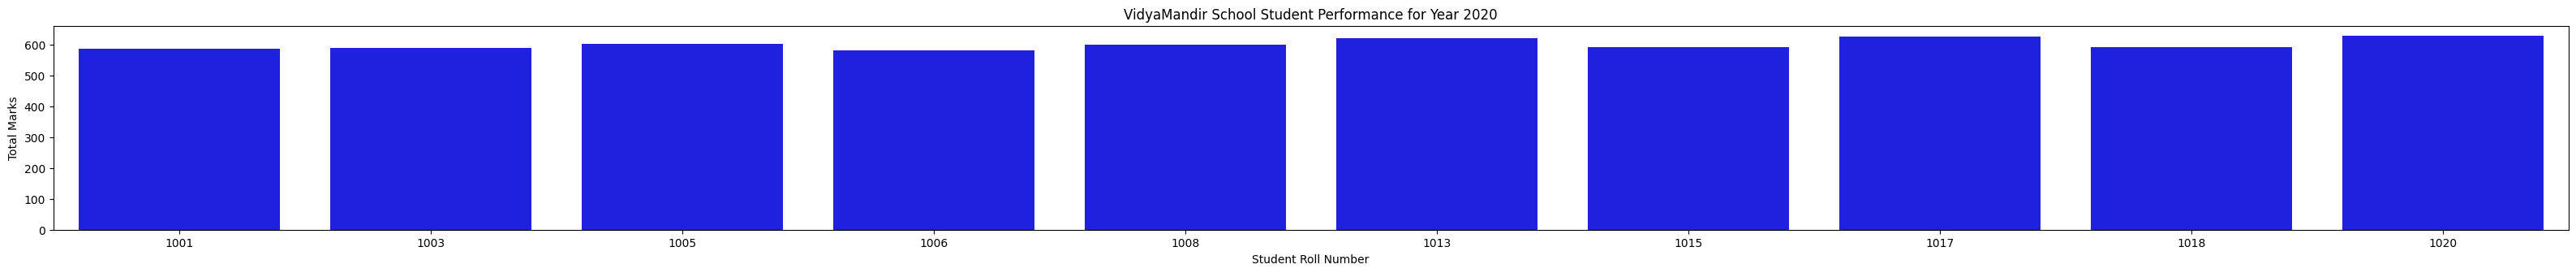

<ipython-input-40-c54384b22168>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StJoseph_2020['Total Marks'] = StJoseph_2020.iloc[:, 2:-3].sum(axis=1)
<ipython-input-40-c54384b22168>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StJoseph_2020['Rank'] = StJoseph_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')


      Student_Name  Total Marks
37   Simi Bhansali          606
26  Agriya Marandi          592
23    Rahul Bansal          563
21    Bibhor Gupta          552
25  Reshma Sultana          545
36  Himanshu Joshi          539
31   Ekta Banerjee          539
28  Rituraj Khanna          534
39   Deep Dasgupta          525
27  Emanuel Joseph          517


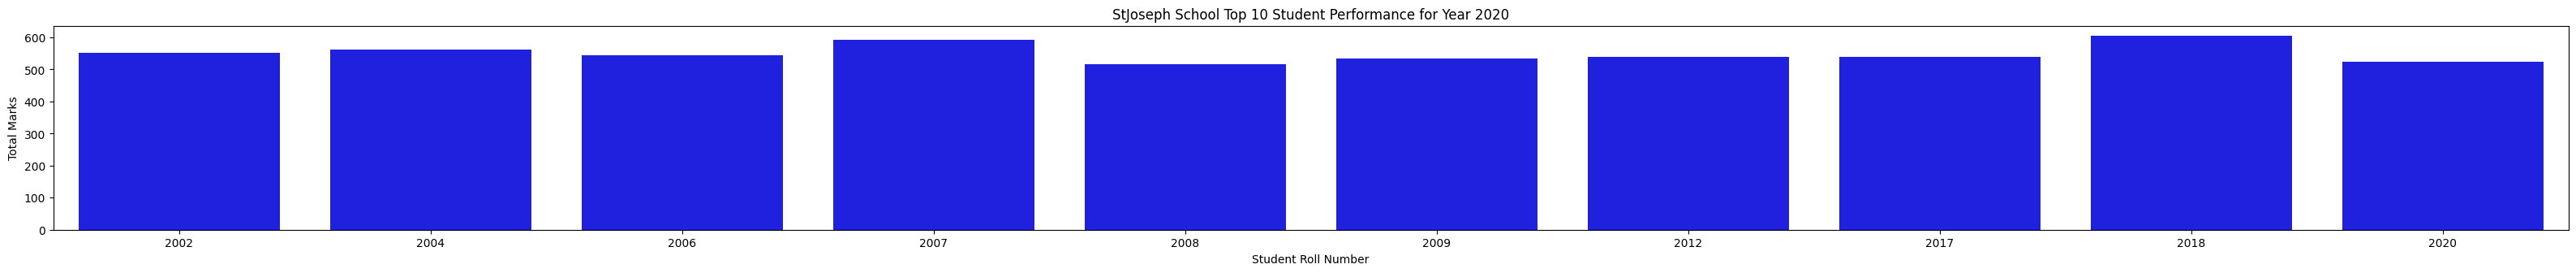

<ipython-input-40-c54384b22168>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPS_2020['Total Marks'] = DPS_2020.iloc[:, 2:-3].sum(axis=1)
<ipython-input-40-c54384b22168>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPS_2020['Rank'] = DPS_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')


      Student_Name  Total Marks
34     Nagashruthi          621
36  Niharika Popat          579
21   Kishor Biyani          574
38     Muhul Ghade          571
32  Ashwini Pushpa          570
20    Anshu Pathak          558
33    Michel Dsuza          538
24    Besent Kumar          506
25           Diana          506
37       Jivan Rao          488


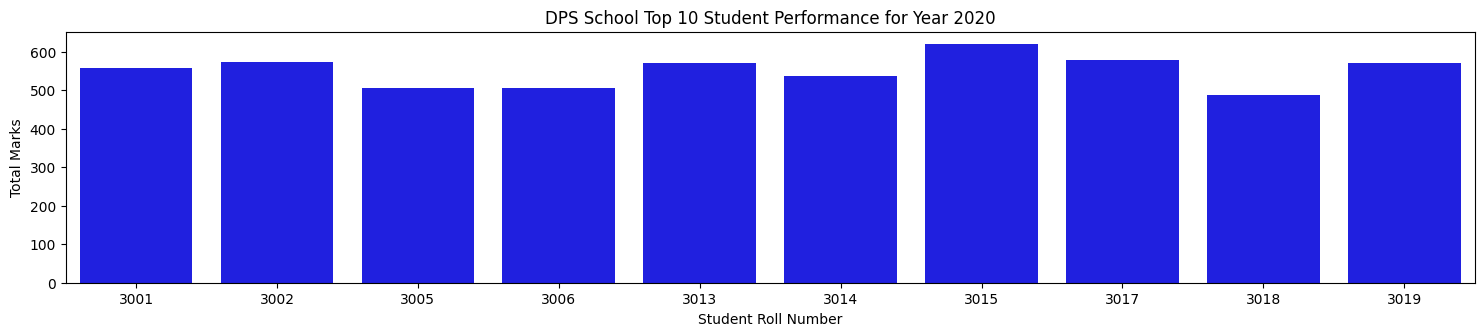

<ipython-input-40-c54384b22168>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BirlaHS_2020['Total Marks'] = BirlaHS_2020.iloc[:, 2:-3].sum(axis=1)
<ipython-input-40-c54384b22168>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BirlaHS_2020['Rank'] = BirlaHS_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')


         Student_Name  Total Marks
29     Hashmukh Patel          635
28  Chanchal Panidhar          633
22        Mashuk Khan          627
31        Anukul Seth          627
38       Nitin Deewan          618
33       Afsana Anjum          618
26      Monica Bharti          606
30     Ridhima Shetty          587
39     Sayantan Ghosh          587
20          Md. Irfan          555


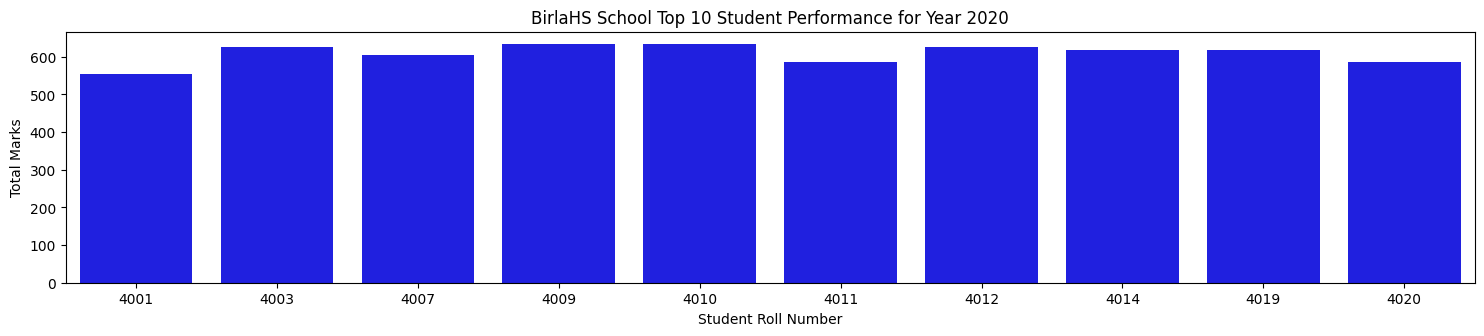

<ipython-input-40-c54384b22168>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  International_2020['Total Marks'] = International_2020.iloc[:, 2:-3].sum(axis=1)
<ipython-input-40-c54384b22168>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  International_2020['Rank'] = International_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')


        Student_Name  Total Marks
20   Swetashi Aiyyar          600
36     Mitushi Ghosh          600
33           Nirmala          594
35    Shivalik Gonda          591
37   Nayan Mahadevan          569
25   James Fernandes          564
23  Ayansh Mukherjee          556
29      Raga Lalitha          554
39        Kumar Amar          554
26      Andrew Peter          539


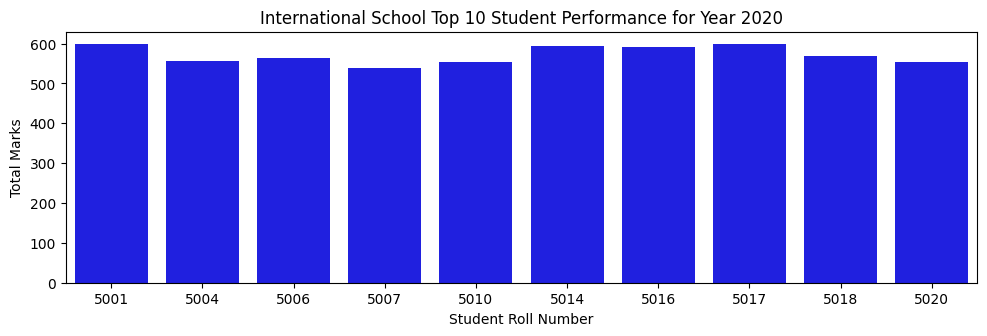

In [ ]:
# 2.Rank each student within their own school based on their total marks scored in the year 2020 and compare the marks of Rank 10 for each school by arranging them in descending order

Vidyamandir_2020 = Vidyamandir[Vidyamandir['Year'] == 2020]
Vidyamandir_2020['Total Marks'] = Vidyamandir_2020.iloc[:, 2:-3].sum(axis=1)
Vidyamandir_2020['Rank'] = Vidyamandir_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')
top_5_students = Vidyamandir_2020[Vidyamandir_2020['Rank'] <= 5][['Student_Name', 'Total Marks']]
sorted_top_5_students = top_5_students.sort_values(by='Total Marks', ascending=False)
print(sorted_top_5_students.head(10))
top_10_students = Vidyamandir_2020.nlargest(10, 'Total Marks')[['Student_Roll', 'Total Marks']]
# Plotting the total marks distribution
plt.figure(figsize=(40, 15))
plt.subplot(4, 1, 1)
sns.barplot(x="Student_Roll", y="Total Marks", data=top_10_students, color="b")
plt.title('VidyaMandir School Student Performance for Year 2020')
plt.xlabel('Student Roll Number')
plt.ylabel('Total Marks')
plt.show()

StJoseph_2020 = StJoseph[StJoseph['Year'] == 2020]
StJoseph_2020['Total Marks'] = StJoseph_2020.iloc[:, 2:-3].sum(axis=1)
StJoseph_2020['Rank'] = StJoseph_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')
top_10_students_StJoseph = StJoseph_2020[StJoseph_2020['Rank'] <= 5][['Student_Name', 'Total Marks']]
sorted_top_10_students_StJoseph = top_10_students_StJoseph.sort_values(by='Total Marks', ascending=False)
print(sorted_top_10_students_StJoseph.head(10))
top_10_students_StJoseph = StJoseph_2020.nlargest(10, 'Total Marks')[['Student_Roll', 'Total Marks']]
plt.figure(figsize=(40, 15))
plt.subplot(4, 1, 2)
sns.barplot(x="Student_Roll", y="Total Marks", data=top_10_students_StJoseph, color="b")
plt.title('StJoseph School Top 10 Student Performance for Year 2020')
plt.xlabel('Student Roll Number')
plt.ylabel('Total Marks')
plt.show()


DPS_2020 = DPS[DPS['Year'] == 2020]
DPS_2020['Total Marks'] = DPS_2020.iloc[:, 2:-3].sum(axis=1)
DPS_2020['Rank'] = DPS_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')
top_10_students_DPS = DPS_2020[DPS_2020['Rank'] <= 5][['Student_Name', 'Total Marks']]
sorted_top_10_students_DPS = top_10_students_DPS.sort_values(by='Total Marks', ascending=False)
print(sorted_top_10_students_DPS.head(10))
top_10_students_DPS = DPS_2020.nlargest(10, 'Total Marks')[['Student_Roll', 'Total Marks']]
plt.figure(figsize=(40, 15))
plt.subplot(4, 2, 1)
sns.barplot(x="Student_Roll", y="Total Marks", data=top_10_students_DPS, color="b")
plt.title('DPS School Top 10 Student Performance for Year 2020')
plt.xlabel('Student Roll Number')
plt.ylabel('Total Marks')
plt.show()

BirlaHS_2020 = BirlaHS[BirlaHS['Year'] == 2020]
BirlaHS_2020['Total Marks'] = BirlaHS_2020.iloc[:, 2:-3].sum(axis=1)
BirlaHS_2020['Rank'] = BirlaHS_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')
top_10_students_BirlaHS = BirlaHS_2020[BirlaHS_2020['Rank'] <= 5][['Student_Name', 'Total Marks']]
sorted_top_10_students_BirlaHS = top_10_students_BirlaHS.sort_values(by='Total Marks', ascending=False)
print(sorted_top_10_students_BirlaHS.head(10))
top_10_students_BirlaHS = BirlaHS_2020.nlargest(10, 'Total Marks')[['Student_Roll', 'Total Marks']]
plt.figure(figsize=(40, 15))
plt.subplot(4, 2, 2)
sns.barplot(x="Student_Roll", y="Total Marks", data=top_10_students_BirlaHS, color="b")
plt.title('BirlaHS School Top 10 Student Performance for Year 2020')
plt.xlabel('Student Roll Number')
plt.ylabel('Total Marks')
plt.show()


International_2020 = International[International['Year'] == 2020]
International_2020['Total Marks'] = International_2020.iloc[:, 2:-3].sum(axis=1)
International_2020['Rank'] = International_2020.groupby('Student_Name')['Total Marks'].rank(ascending=False, method='min')
top_10_students_International = International_2020[International_2020['Rank'] <= 5][['Student_Name', 'Total Marks']]
sorted_top_10_students_International = top_10_students_International.sort_values(by='Total Marks', ascending=False)
print(sorted_top_10_students_International.head(10))
top_10_students_International = International_2020.nlargest(10, 'Total Marks')[['Student_Roll', 'Total Marks']]
plt.figure(figsize=(40, 15))
plt.subplot(4, 3, 1)
sns.barplot(x="Student_Roll", y="Total Marks", data=top_10_students_International, color="b")
plt.title('International School Top 10 Student Performance for Year 2020')
plt.xlabel('Student Roll Number')
plt.ylabel('Total Marks')
plt.show()


Subject: Hindi
  Student Roll: 1011
  Student Name: Sonal Tripathi
  Total Improvement: 71

Subject: English
  Student Roll: 3005
  Student Name: Besent Kumar
  Total Improvement: 59

Subject: Mathematics
  Student Roll: 3008
  Student Name: Manyathi Shetty
  Total Improvement: 67

Subject: Physics
  Student Roll: 1013
  Student Name: Praddep Meena
  Total Improvement: 63

Subject: Chemistry
  Student Roll: 3020
  Student Name: Manshukh Bhayani
  Total Improvement: 65

Subject: Biology
  Student Roll: 4019
  Student Name: Nitin Deewan
  Total Improvement: 54

Subject: History
  Student Roll: 2004
  Student Name: Rahul Bansal
  Total Improvement: 51

Subject: Geography
  Student Roll: 1010
  Student Name: Subhajeet Dutta
  Total Improvement: 61

Subject: Civics
  Student Roll: 1018
  Student Name: Sanjana Venkatramana
  Total Improvement: 65

Subject: Computer_Science
  Student Roll: 1017
  Student Name: Rashmi Desai
  Total Improvement: 82

Subject: Physical_Education
  Student Roll: 1

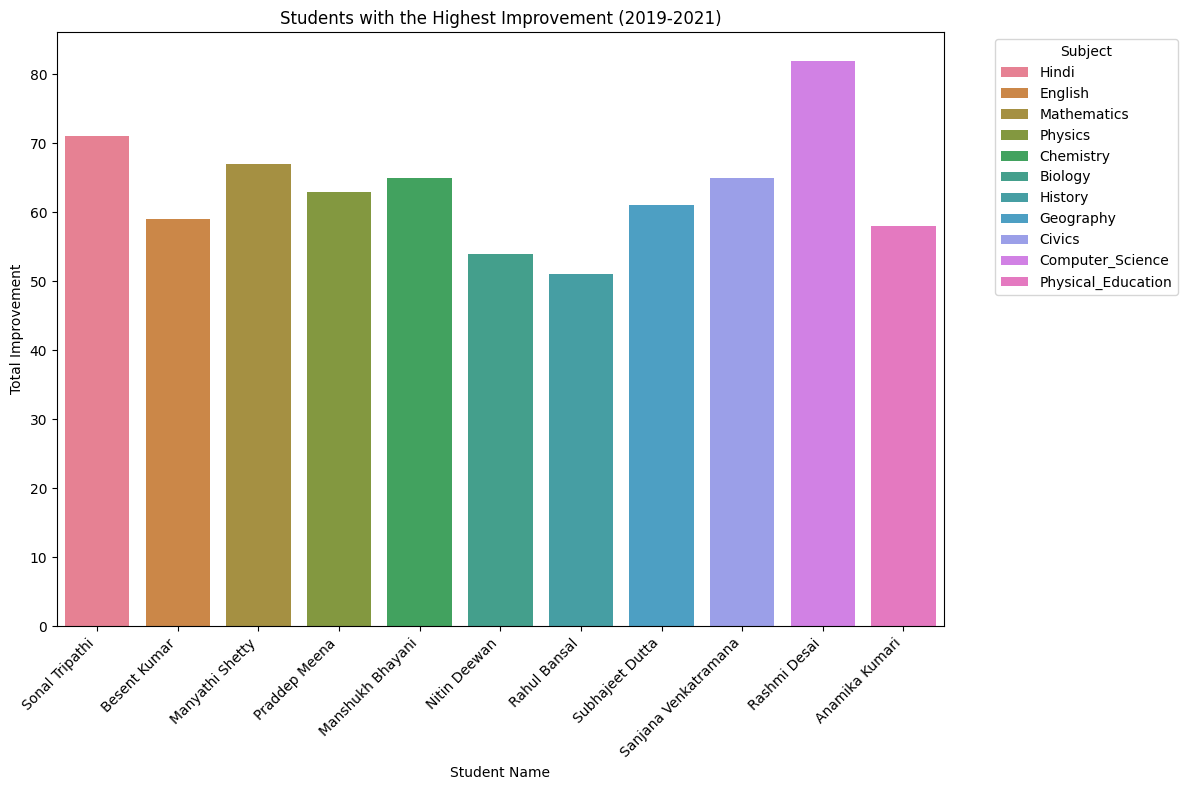

In [ ]:
# 3.Find out students with the highest improvement for each subject from 2019-21 combining all the schools together

data_of_2019 = allschools[allschools['Year'] == 2019]
data_of_2020 = allschools[allschools['Year'] == 2020]
data_of_2021 = allschools[allschools['Year'] == 2021]

data_of_2019 = data_of_2019.sort_values('Student_Roll').reset_index(drop=True)
data_of_2020 = data_of_2020.sort_values('Student_Roll').reset_index(drop=True)
data_of_2021 = data_of_2021.sort_values('Student_Roll').reset_index(drop=True)


Main_subjects = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry',
                 'Biology', 'History', 'Geography', 'Civics',
                 'Computer_Science', 'Physical_Education']

improved_data = data_of_2021[['Student_Roll', 'Student_Name']].copy()


for subject in Main_subjects:
    improvement_2019_to_2020 = data_of_2020[subject].values - data_of_2019[subject].values
    improvement_2020_to_2021 = data_of_2021[subject].values - data_of_2020[subject].values
    total_improvement = data_of_2021[subject].values - data_of_2019[subject].values

    improved_data[subject + '_Improvement_2019_to_2020'] = improvement_2019_to_2020
    improved_data[subject + '_Improvement_2020_to_2021'] = improvement_2020_to_2021
    improved_data[subject + '_Total_Improvement'] = total_improvement

highest_improvement = {}

for subject in Main_subjects:
    max_improvement = improved_data[subject + '_Total_Improvement'].max()
    top_student = improved_data[
        improved_data[subject + '_Total_Improvement'] == max_improvement
    ][['Student_Roll', 'Student_Name']].iloc[0]
    highest_improvement[subject] = {
        'Student Roll': top_student['Student_Roll'],
        'Student Name': top_student['Student_Name'],
        'Total Improvement': max_improvement
    }

graph_data = {'Subject': [], 'Student Name': [], 'Total Improvement': []}

for subject, data in highest_improvement.items():
    print(f"Subject: {subject}")
    print(f"  Student Roll: {data['Student Roll']}")
    print(f"  Student Name: {data['Student Name']}")
    print(f"  Total Improvement: {data['Total Improvement']}")
    print()
    # Add data for graph
    graph_data['Subject'].append(subject)
    graph_data['Student Name'].append(data['Student Name'])
    graph_data['Total Improvement'].append(data['Total Improvement'])

# Created a bar plot for highest improvement
plt.figure(figsize=(12, 8))
sns.barplot(x='Student Name', y='Total Improvement', hue='Subject', dodge=False, data=pd.DataFrame(graph_data))
plt.title('Students with the Highest Improvement (2019-2021)')
plt.xlabel('Student Name')
plt.ylabel('Total Improvement')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Best Schools for Each Stream:
{'Best_Arts_School': 'Birla HS', 'Best_Science_School': 'International', 'Best_Commerce_School': 'Vidyamandir'}


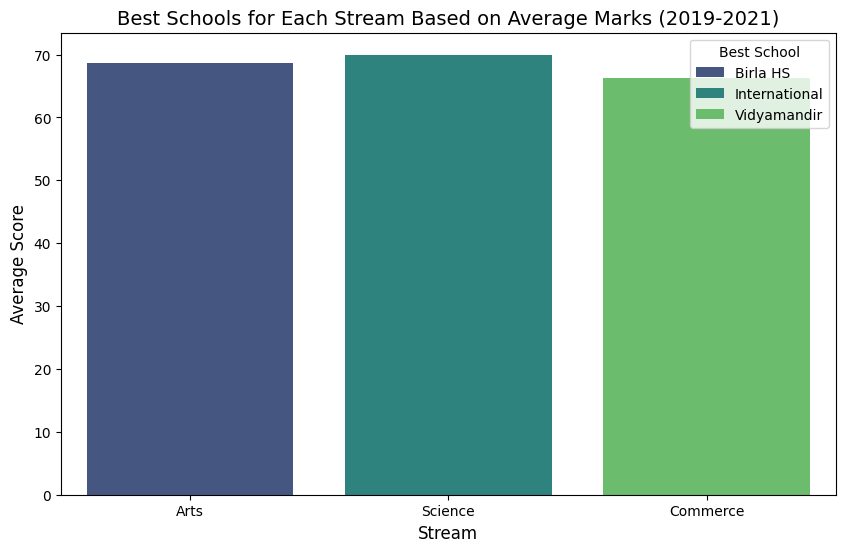

In [ ]:
# 4.Identify best school for Arts, Science and Commerce streams based on marks scored by students in respective subjects for those streams in last three years


def get_school_name(roll_number):
    if 1001 <= roll_number <= 1020:
        return 'Vidyamandir'
    elif 2001 <= roll_number <= 2020:
        return 'St.Joseph'
    elif 3001 <= roll_number <= 3020:
        return 'DPS'
    elif 4001 <= roll_number <= 4020:
        return 'Birla HS'
    elif 5001 <= roll_number <= 5020:
        return 'International'
    else:
        return 'Unknown School'

# Assuming 'allschools' is the concatenated dataframe
# Filtering data for last 3 years (2019, 2020, 2021)
data_2019_2021 = allschools[allschools['Year'].isin([2019, 2020, 2021])]

# Define subjects for Arts, Science, and Commerce streams
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer_Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer_Science', 'Physical_Education']

# Calculate average marks for each stream by student
allschools['Arts_Stream_Score'] = allschools[arts_subjects].mean(axis=1)
allschools['Science_Stream_Score'] = allschools[science_subjects].mean(axis=1)
allschools['Commerce_Stream_Score'] = allschools[commerce_subjects].mean(axis=1)

# Add 'School_Name' column based on roll number
allschools['School_Name'] = allschools['Student_Roll'].apply(get_school_name)

# Group by School_Name and calculate average scores for each stream
school_performance = allschools.groupby('School_Name').agg(
    Arts_Stream_Avg=('Arts_Stream_Score', 'mean'),
    Science_Stream_Avg=('Science_Stream_Score', 'mean'),
    Commerce_Stream_Avg=('Commerce_Stream_Score', 'mean')
).reset_index()

# Identify the best school for each stream based on average stream scores
best_schools = {
    'Best_Arts_School': school_performance.loc[school_performance['Arts_Stream_Avg'].idxmax(), 'School_Name'],
    'Best_Science_School': school_performance.loc[school_performance['Science_Stream_Avg'].idxmax(), 'School_Name'],
    'Best_Commerce_School': school_performance.loc[school_performance['Commerce_Stream_Avg'].idxmax(), 'School_Name']
}

# Display the results with school names
print("Best Schools for Each Stream:")
print(best_schools)


# Plotting the bar graph
# Prepare data for the bar graph
best_schools_data = {
    'Stream': ['Arts', 'Science', 'Commerce'],
    'Best_School': [best_schools['Best_Arts_School'], best_schools['Best_Science_School'], best_schools['Best_Commerce_School']],
    'Score': [
        school_performance.loc[school_performance['School_Name'] == best_schools['Best_Arts_School'], 'Arts_Stream_Avg'].values[0],
        school_performance.loc[school_performance['School_Name'] == best_schools['Best_Science_School'], 'Science_Stream_Avg'].values[0],
        school_performance.loc[school_performance['School_Name'] == best_schools['Best_Commerce_School'], 'Commerce_Stream_Avg'].values[0]
    ]
}

best_schools_df = pd.DataFrame(best_schools_data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Stream', y='Score', hue='Best_School', data=best_schools_df, palette='viridis')
plt.title('Best Schools for Each Stream Based on Average Marks (2019-2021)', fontsize=14)
plt.ylabel('Average Score', fontsize=12)
plt.xlabel('Stream', fontsize=12)
plt.legend(title='Best School')
plt.show()


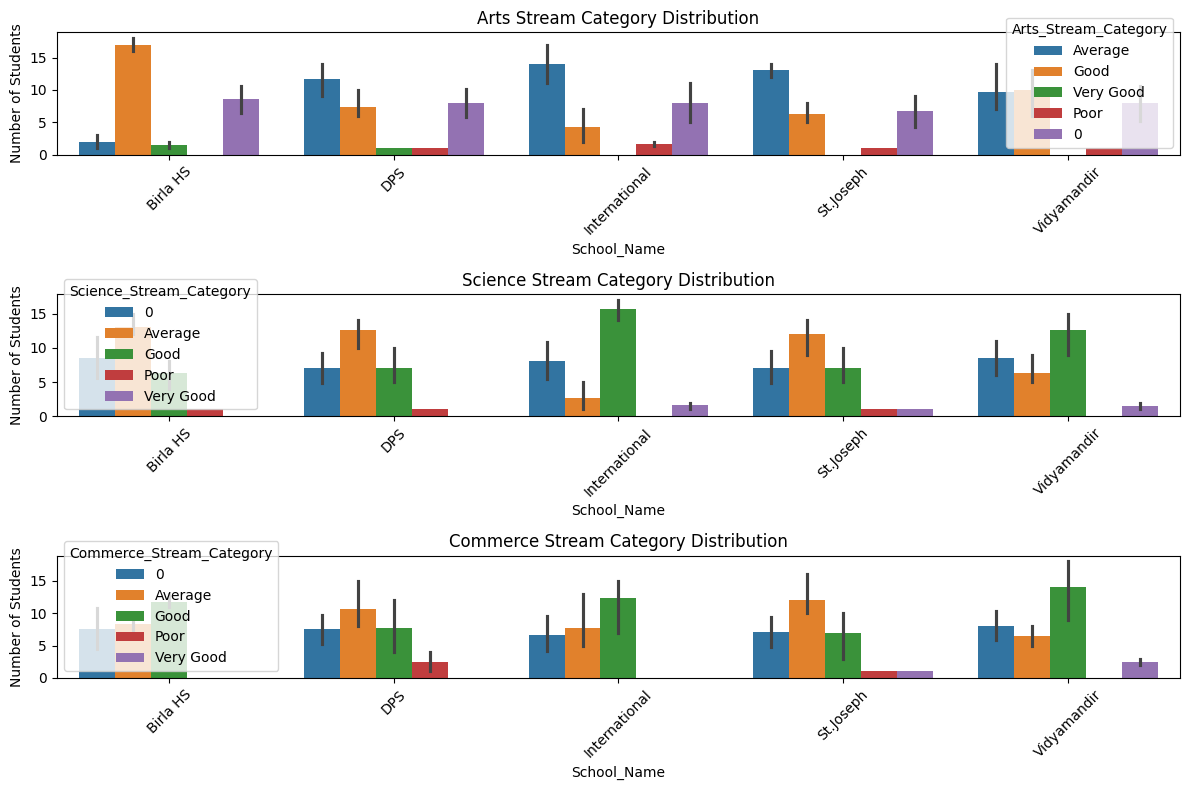

In [ ]:
# 5. If the marks obtained for each subject can be categorised under 5 sections like below Then calculate for each school how many students were in each category based on the avg. marks obtained each year

def categorize_marks(marks):
    if marks <= 20:
        return 'Very Poor'
    elif 20 < marks <= 40:
        return 'Poor'
    elif 40 < marks <= 60:
        return 'Average'
    elif 60 < marks <= 80:
        return 'Good'
    elif 80 < marks <= 100:
        return 'Very Good'
    else:
        return 'Unknown'

# Assuming 'allschools' is the dataframe with all the data

# Filter the data for the last 3 years
data_2019_2021 = allschools[allschools['Year'].isin([2019, 2020, 2021])]

# List of subject categories
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer_Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer_Science', 'Physical_Education']

# Calculate average marks for each student for each year (across all subjects for each stream)
data_2019_2021['Arts_Stream_Score'] = data_2019_2021[arts_subjects].mean(axis=1)
data_2019_2021['Science_Stream_Score'] = data_2019_2021[science_subjects].mean(axis=1)
data_2019_2021['Commerce_Stream_Score'] = data_2019_2021[commerce_subjects].mean(axis=1)

# Create a 'Category' column based on the average score for each stream (Arts, Science, Commerce)
data_2019_2021['Arts_Stream_Category'] = data_2019_2021['Arts_Stream_Score'].apply(categorize_marks)
data_2019_2021['Science_Stream_Category'] = data_2019_2021['Science_Stream_Score'].apply(categorize_marks)
data_2019_2021['Commerce_Stream_Category'] = data_2019_2021['Commerce_Stream_Score'].apply(categorize_marks)

# Group by School_Name, Year, and Category and count the students in each category for each stream
arts_category_count = data_2019_2021.groupby(['School_Name', 'Year', 'Arts_Stream_Category']).size().reset_index(name='Count')
science_category_count = data_2019_2021.groupby(['School_Name', 'Year', 'Science_Stream_Category']).size().reset_index(name='Count')
commerce_category_count = data_2019_2021.groupby(['School_Name', 'Year', 'Commerce_Stream_Category']).size().reset_index(name='Count')

# Combine all category counts into one dataframe
category_counts = pd.concat([arts_category_count, science_category_count, commerce_category_count])


category_counts = category_counts.fillna(0)

plt.figure(figsize=(12, 8))

# Arts Stream Bar Plot
plt.subplot(3, 1, 1)
sns.barplot(x='School_Name', y='Count', hue='Arts_Stream_Category', data=category_counts[category_counts['Arts_Stream_Category'].notna()])
plt.title('Arts Stream Category Distribution')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# Science Stream Bar Plot
plt.subplot(3, 1, 2)
sns.barplot(x='School_Name', y='Count', hue='Science_Stream_Category', data=category_counts[category_counts['Science_Stream_Category'].notna()])
plt.title('Science Stream Category Distribution')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# Commerce Stream Bar Plot
plt.subplot(3, 1, 3)
sns.barplot(x='School_Name', y='Count', hue='Commerce_Stream_Category', data=category_counts[category_counts['Commerce_Stream_Category'].notna()])
plt.title('Commerce Stream Category Distribution')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Best School in 2019: Birla HS with 20 students in Good and Very Good categories
Best School in 2020: Birla HS with 20 students in Good and Very Good categories
Best School in 2021: Birla HS with 20 students in Good and Very Good categories


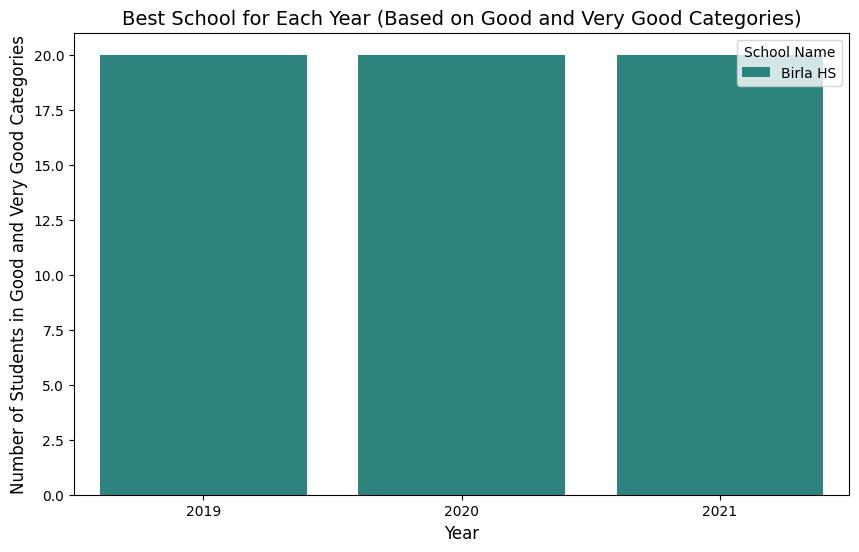

In [ ]:
# 6.Which is the best school for each year 2019, 2020 and 2021 based on highest no. of students in Good and Very Good category

# Define function to get school name based on roll number
def get_school_name(Student_Roll):
    if 1001 <= Student_Roll <= 1020:
        return 'Vidyamandir'
    elif 2001 <= Student_Roll <= 2020:
        return 'St.Joseph'
    elif 3001 <= Student_Roll <= 3020:
        return 'DPS'
    elif 4001 <= Student_Roll <= 4020:
        return 'Birla HS'
    elif 5001 <= Student_Roll <= 5020:
        return 'International'
    else:
        return 'Unknown School'

# Assuming 'allschools' is the concatenated dataframe
# Filtering data for last 3 years (2019, 2020, 2021)
data_2019_2021 = allschools[allschools['Year'].isin([2019, 2020, 2021])]

# Define subjects for Arts, Science, and Commerce streams
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer_Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer_Science', 'Physical_Education']

# Calculate average marks for each stream by student
allschools['Arts_Stream_Score'] = allschools[arts_subjects].mean(axis=1)
allschools['Science_Stream_Score'] = allschools[science_subjects].mean(axis=1)
allschools['Commerce_Stream_Score'] = allschools[commerce_subjects].mean(axis=1)

# Add 'School_Name' column based on roll number
allschools['School_Name'] = allschools['Student_Roll'].apply(get_school_name)

# Function to categorize students based on their average score
def categorize_student(score):
    if score <= 20:
        return 'Very Poor'
    elif 20 < score <= 40:
        return 'Poor'
    elif 40 < score <= 60:
        return 'Average'
    elif 60 < score <= 80:
        return 'Good'
    elif 80 < score <= 100:
        return 'Very Good'

# Categorize students for each stream
allschools['Arts_Stream_Category'] = allschools['Arts_Stream_Score'].apply(categorize_student)
allschools['Science_Stream_Category'] = allschools['Science_Stream_Score'].apply(categorize_student)
allschools['Commerce_Stream_Category'] = allschools['Commerce_Stream_Score'].apply(categorize_student)

# Create a category column that combines all categories (Good and Very Good for all streams)
allschools['Best_Stream_Category'] = allschools.apply(
    lambda row: 'Good/Very Good' if row['Arts_Stream_Category'] in ['Good', 'Very Good'] or
                               row['Science_Stream_Category'] in ['Good', 'Very Good'] or
                               row['Commerce_Stream_Category'] in ['Good', 'Very Good'] else 'Other',
    axis=1
)

# Filter data for 'Good/Very Good' students
category_counts = allschools[allschools['Best_Stream_Category'] == 'Good/Very Good']

# Count students in Good/Very Good categories for each school and year
category_counts_2019 = category_counts[category_counts['Year'] == 2019]
category_counts_2020 = category_counts[category_counts['Year'] == 2020]
category_counts_2021 = category_counts[category_counts['Year'] == 2021]

# Count students in Good and Very Good categories for each school and year
def get_best_school_by_year(data):
    school_performance = data.groupby('School_Name').size().reset_index(name='Student_Count')
    best_school = school_performance.loc[school_performance['Student_Count'].idxmax()]
    return best_school['School_Name'], best_school['Student_Count']

best_school_2019, count_2019 = get_best_school_by_year(category_counts_2019)
best_school_2020, count_2020 = get_best_school_by_year(category_counts_2020)
best_school_2021, count_2021 = get_best_school_by_year(category_counts_2021)

# Display the results
print(f"Best School in 2019: {best_school_2019} with {count_2019} students in Good and Very Good categories")
print(f"Best School in 2020: {best_school_2020} with {count_2020} students in Good and Very Good categories")
print(f"Best School in 2021: {best_school_2021} with {count_2021} students in Good and Very Good categories")


results_data = {
    'School_Name': [best_school_2019, best_school_2020, best_school_2021],
    'Year': [2019, 2020, 2021],
    'Student_Count': [count_2019, count_2020, count_2021]
}

results_df = pd.DataFrame(results_data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Student_Count', hue='School_Name', data=results_df, palette='viridis')
plt.title('Best School for Each Year (Based on Good and Very Good Categories)', fontsize=14)
plt.ylabel('Number of Students in Good and Very Good Categories', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='School Name')
plt.show()


Best School in 2019: Birla HS with 20 students in Good and Very Good categories
Best School in 2020: Birla HS with 20 students in Good and Very Good categories
Best School in 2021: Birla HS with 20 students in Good and Very Good categories
Growth from 2019 to 2020: 0.00%
Growth from 2020 to 2021: 0.00%


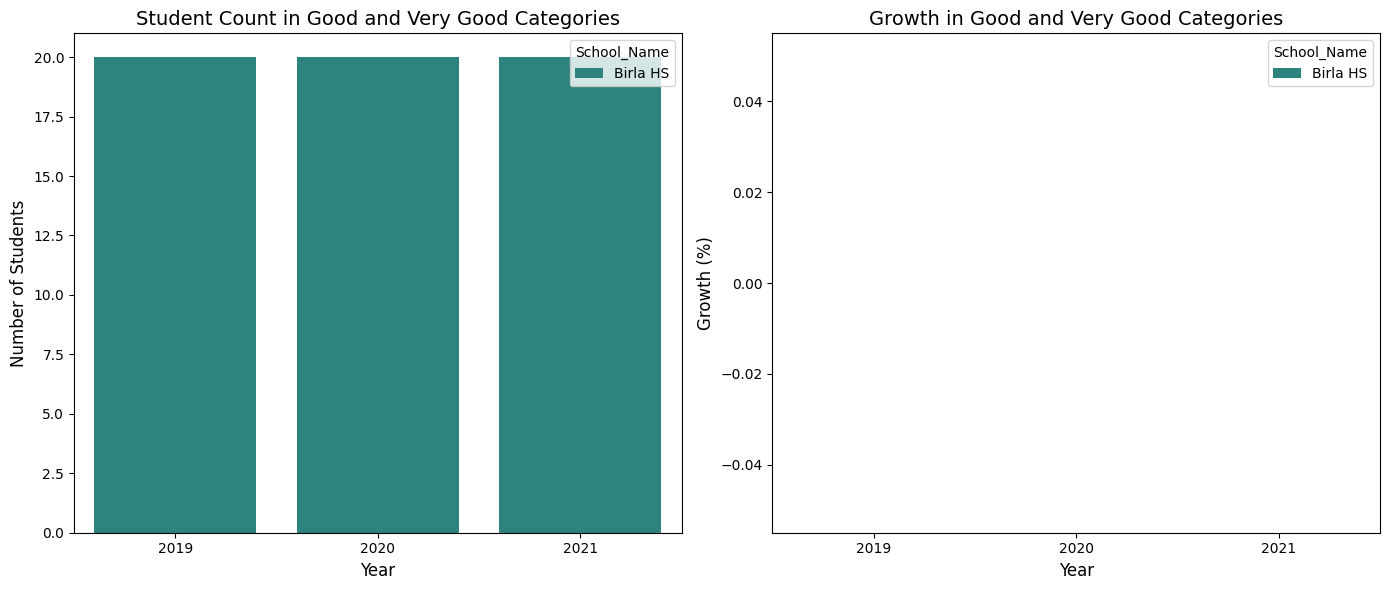

In [ ]:
# 7.Which is the fastest-growing School in Bangalore (Overall and Streamwise)?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'allschools' is the concatenated dataframe containing the relevant data

# Create a category column that combines all categories (Good and Very Good for all streams)
allschools['Best_Stream_Category'] = allschools.apply(
    lambda row: 'Good/Very Good' if row['Arts_Stream_Category'] in ['Good', 'Very Good'] or
                                       row['Science_Stream_Category'] in ['Good', 'Very Good'] or
                                       row['Commerce_Stream_Category'] in ['Good', 'Very Good'] else 'Other',
    axis=1
)

# Filter data for 'Good/Very Good' students
category_counts = allschools[allschools['Best_Stream_Category'] == 'Good/Very Good']

# Count students in Good/Very Good categories for each school and year
category_counts_2019 = category_counts[category_counts['Year'] == 2019]
category_counts_2020 = category_counts[category_counts['Year'] == 2020]
category_counts_2021 = category_counts[category_counts['Year'] == 2021]

# Count students in Good and Very Good categories for each school and year
def get_best_school_by_year(data):
    school_performance = data.groupby('School_Name').size().reset_index(name='Student_Count')
    best_school = school_performance.loc[school_performance['Student_Count'].idxmax()]
    return best_school['School_Name'], best_school['Student_Count']

best_school_2019, count_2019 = get_best_school_by_year(category_counts_2019)
best_school_2020, count_2020 = get_best_school_by_year(category_counts_2020)
best_school_2021, count_2021 = get_best_school_by_year(category_counts_2021)

# Calculate Growth for Each School (Year-over-Year)
def calculate_growth(count_2019, count_2020, count_2021):
    growth_2020 = ((count_2020 - count_2019) / count_2019) * 100 if count_2019 != 0 else 0
    growth_2021 = ((count_2021 - count_2020) / count_2020) * 100 if count_2020 != 0 else 0
    return growth_2020, growth_2021

growth_2019_to_2020, growth_2020_to_2021 = calculate_growth(count_2019, count_2020, count_2021)

# Display the results
print(f"Best School in 2019: {best_school_2019} with {count_2019} students in Good and Very Good categories")
print(f"Best School in 2020: {best_school_2020} with {count_2020} students in Good and Very Good categories")
print(f"Best School in 2021: {best_school_2021} with {count_2021} students in Good and Very Good categories")
print(f"Growth from 2019 to 2020: {growth_2019_to_2020:.2f}%")
print(f"Growth from 2020 to 2021: {growth_2020_to_2021:.2f}%")

# Results data for plotting
results_data = {
    'School_Name': [best_school_2019, best_school_2020, best_school_2021],
    'Year': [2019, 2020, 2021],
    'Student_Count': [count_2019, count_2020, count_2021],
    'Growth_2019_2020': [growth_2019_to_2020] * 3,
    'Growth_2020_2021': [growth_2020_to_2021] * 3
}

results_df = pd.DataFrame(results_data)

# Plotting the bar chart for student counts and growth
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Barplot for student count in Good and Very Good categories
sns.barplot(x='Year', y='Student_Count', hue='School_Name', data=results_df, palette='viridis', ax=ax1)
ax1.set_title('Student Count in Good and Very Good Categories', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Students', fontsize=12)

# Barplot for growth in percentage
sns.barplot(x='Year', y='Growth_2019_2020', hue='School_Name', data=results_df, palette='viridis', ax=ax2)
ax2.set_title('Growth in Good and Very Good Categories', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Growth (%)', fontsize=12)

plt.tight_layout()
plt.show()


     School_Name  Arts_Stream_Avg  Science_Stream_Avg  Commerce_Stream_Avg
0       Birla HS             68.7           55.123333            60.853333
1            DPS            58.41           55.906667            56.856667
2  International        53.636667               69.98            62.696667
3      St.Joseph            55.72           56.993333            56.433333
4    Vidyamandir            59.57           63.523333                66.27


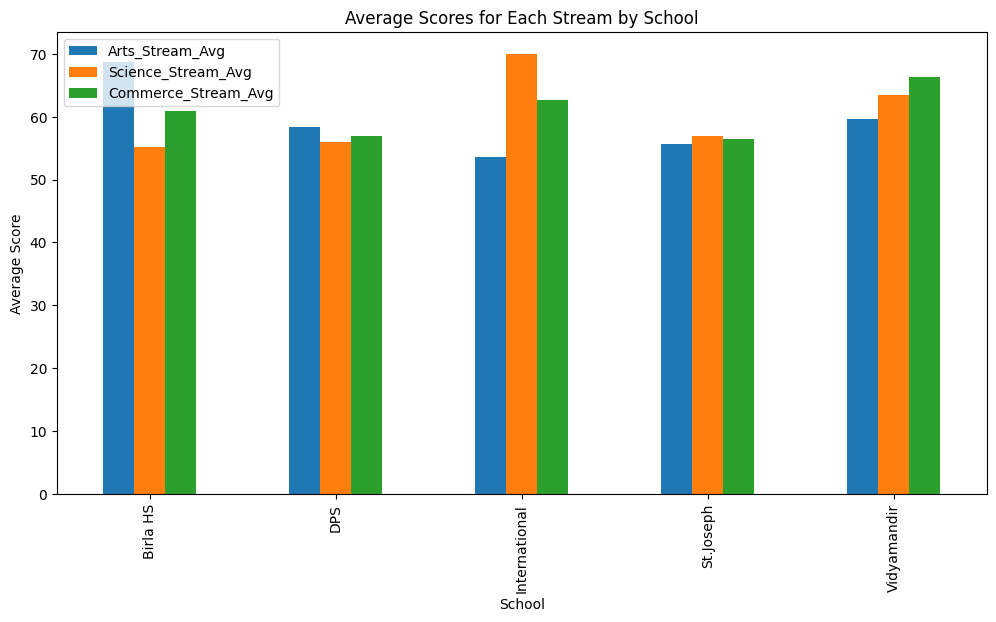

In [ ]:
#7.Which is the fastest-growing School in Bangalore (Overall and Streamwise)?
# Which is the fastest-growing School in Bangalore (Overall and Streamwise)
print(school_performance)
school_performance[['School_Name', 'Arts_Stream_Avg', 'Science_Stream_Avg', 'Commerce_Stream_Avg']].plot(x='School_Name', kind='bar', figsize=(12, 6))
plt.title('Average Scores for Each Stream by School')
plt.ylabel('Average Score')
plt.xlabel('School')
plt.show()